# Building A Handwritten Digits Classifier

In this project, we plan on building a model that can classify handwritten digits.

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. We'll explore the effectiveness of deep, feedforward neural networks at classifying images.

## Working with Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the `label` column) and pass the result into that into the numpy.reshape() function.

Once the data is in the right shape, we can visualize it using pyplot.imshow() function:

In [12]:
# importing necessary libraries
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
# getting numpy 2d array keys
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# turning 'target' variable into pd.Series
labels = pd.Series(digits_data['target'])

data=pd.DataFrame(digits_data['data'])

# checking first five rows of data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


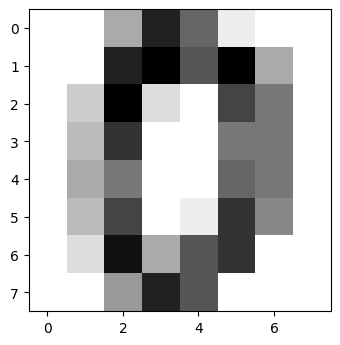

In [6]:
# getting first image's (first row) pixel values
first_image = data.iloc[0]

# r
np_image = first_image.values
print(type(first_image))
print(type(np_image))

#reshaping image 
np_image = np_image.reshape(8,8) # 8x8: 64 pixel values

# visualizing the data
plt.imshow(np_image, cmap='gray_r')

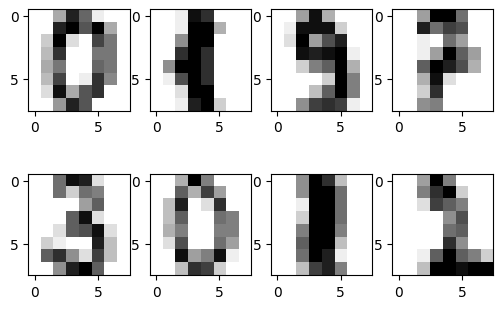

In [7]:
# framing scatter plot grid
f, axarr = plt.subplots(2,4)

# showing the first, 100th, 200th, and 300th image in the dataset
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

# showing the 1000th, 1100th, 1200th, and 1200th image in the dataset
axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors

In [26]:
# 50% training/test validation

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9888728037614452

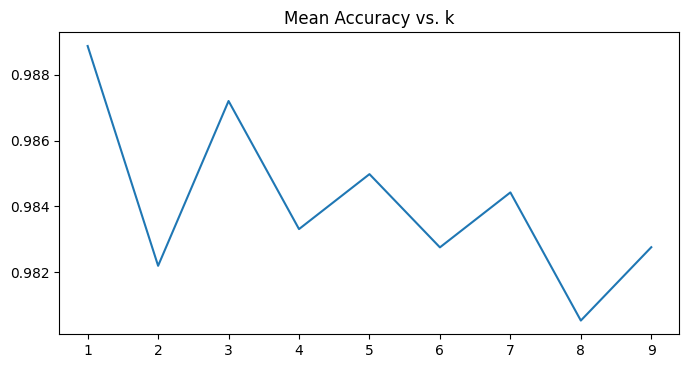

In [27]:
# assessing different values for k and plotting their accuracies
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

## Neural Network with One Hidden Layer

There are a few downsides to using k-nearest neigbors:

- high memory usage
- no model representation to debug and explore

We could try a neural network with a single hidden layer.

In [33]:
#MLPClassifier
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data): #.split: generates indices to split data into training and test set
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index] , labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels) #MLPClassifier
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.9048416233605543, 0.9488146498391486, 0.958824548379114, 0.9721826280623609, 0.9732986884434546, 0.9777456075228904]


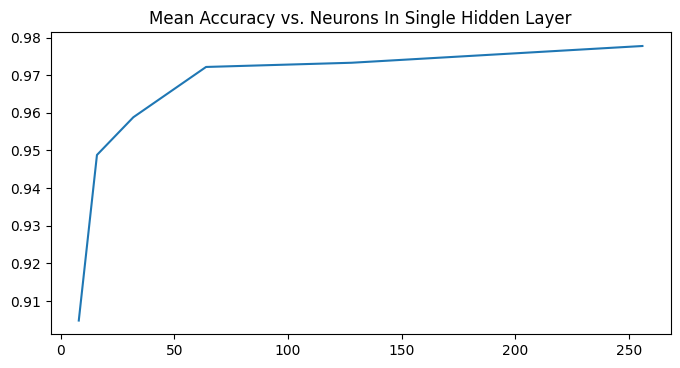

In [35]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)
print(nn_one_accuracies)

### Summary

Adding more neurons to the single hidden layer steadily improved simple accuracy up to ~97.8%, but still less than what the K-Nearest model provided.

Seeing that k-nearest neighbors achieved better results, there doesn't seem to be any advantages to using a single hideen layer neural network for this problem.

## Neural Networks with Two Hidden Layers

Let's see what the results are when adding more layers and neurons.

[0.9710690423162583, 0.9771900519673349]


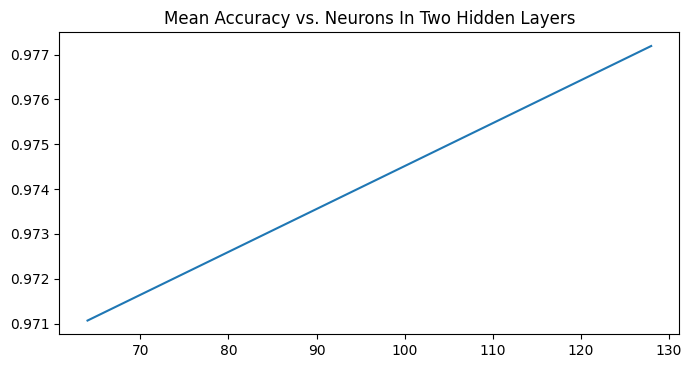

In [36]:
# two neurons + two layers
nn_two_neurons = [
    (64,64),
    (128,128),
]

nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)
print(nn_two_accuracies)

### Summary
Using two hidden layers improved our simple accuracy to 98%. While, traditionally, we might worry about overfitting, using four-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network with Three Hidden Layers

Using more hidden layers is knownw to increase the amount of overfitting that happens. To prevent this, we can increase the number of folds used for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [37]:
#Modifying the neural network training pipeline to use 6 fold cross validation instead.

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# 6 fold cross validation
def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.9248866592344854, 0.9677313266443702, 0.9805314009661835]


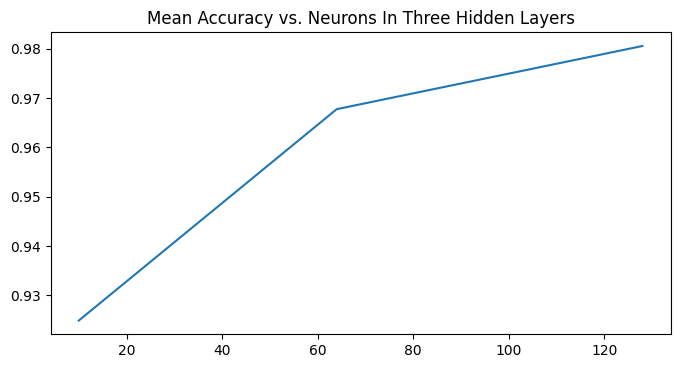

In [39]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)
print(nn_three_accuracies)

### Summary
Using three hidden layers returned a simple accuracy of 98%, even with six-fold cross validation.

# Conclusions and Next Steps

- Use the existing pipeline you've built to try other machine learning models:
    - Decision Tree Models
    - Random Forest Models
- Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.
- Experiment with different activation functions to see if the accuracies improve.
- Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.